Brett Francoeur

MongoDB connection data analysis of IMDB movieset with exploration into AI intergration

In [1]:
import json

# Demonstration of how to load a file that contains secure passwords without accidentally leaking those passwords
with open(r'C:\Users\1999b\OneDrive\School Work\BC\DATA 320\credentials.json') as f:
    data = json.load(f)
    secret_key = data['mysecretkey']

# We can safely print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

#Connect to the secret key file to keep passwords hidden
mongo_connection_string = data['mysecretkey']

My secret key is 68 characters in length.


In [2]:
#Import all necessary extensions for this project
import pandas as pd
import re
import pymongo
import certifi

client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())
da320_database = client['Assignment']

#List all collections associated with this MongoDB account
allCollections = da320_database.list_collection_names()
print(f"This database contains the following collections {allCollections}")

ConfigurationError: The DNS query name does not exist: _mongodb._tcp.cluster0.zyeesyi.mongodb.net.

In [ ]:
# Fetch data for the year 2001 from the "IMDB_Pipeline_Views" collection
cursor = pd.DataFrame(da320_database.IMDB_Pipeline_Views.find({ "release_date": re.compile("2001")}))

#Convert this info into pandas dataframe
IMDB = pd.DataFrame(cursor)

IMDB.head()

""


In [ ]:
# Find the data from Metacritic for 2001
query = {'release_date': re.compile(r"2001")}

cursor = da320_database['metacritic'].find(query)

metacritic_view = pd.DataFrame(cursor)

# Only the IMDB dataset has been transformed, so... lets transform the metacritic values to numbers
metacritic_view.score = pd.to_numeric(metacritic_view.score, errors='coerce')
metacritic_view.release_date = pd.to_datetime(metacritic_view.release_date, errors='coerce')

metacritic_view.head()


,_id,movie_id,title,release_date,description,score,thumbnail
0,6525c0bffdf8fb2276a295f4,11598,Apocalypse Now Redux,2001-08-03,"During the Vietnam War, Captain Willard is sen...",92,https://static.metacritic.com/images/products/...
1,6525c0bffdf8fb2276a295f5,11599,The Lord of the Rings: The Fellowship of the Ring,2001-12-19,"An epic adventure of good against evil, a stor...",92,https://static.metacritic.com/images/products/...
2,6525c0bffdf8fb2276a295f6,11600,Werckmeister Harmonies,2001-10-10,"Based on László Krasznahorkai's novel ""The Mel...",92,https://static.metacritic.com/images/products/...
3,6525c0bffdf8fb2276a295f7,11601,My Voyage to Italy,2001-10-19,A four-hour odyssey through the history of Ita...,90,https://static.metacritic.com/images/products/...
4,6525c0bffdf8fb2276a295f8,11602,Gosford Park,2001-12-26,"This ensemble murder mystery satire, set in 19...",90,https://static.metacritic.com/images/products/...


In [ ]:
#Load data from IMDB

IMDB = pd.DataFrame(da320_database.IMDB_Pipeline_Views.find({"release_year": 2001}))
IMDB.head()

,_id,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres,cast,director,prodcuer,company,release_date,mpaa_rating,new_rating,release_year,release_month,release_day
0,652b4570859d0a9600bc01f1,Black Hawk Down,144.0,7,390546,92000000.0,193021.0,172989651.0,"[Action, Drama, History, War]","[Josh Hartnett, Ewan McGregor, Tom Sizemore, E...",[Ridley Scott],"[Jerry Bruckheimer, Harry Humphries, Branko ...","[Revolution Studios, Jerry Bruckheimer Films,...",2001-12-18,[R],R,2001,12,18
1,652b4570859d0a9600bc01f6,Donnie Darko,113.0,8,786751,4500000.0,24728.0,7510877.0,"[Drama, Mystery, Sci-Fi, Thriller]","[Jake Gyllenhaal, Holmes Osborne, Maggie Gylle...",[Richard Kelly],"[Christopher Ball, Drew Barrymore, Adam Fiel...","[Pandora Cinema, Flower Films, Adam Fields P...",2001-01-19,[R],R,2001,1,19
2,652b4570859d0a9600bc0207,Training Day,122.0,7,427059,45000000.0,22550788.0,104876233.0,"[Action, Crime, Drama, Thriller]","[Denzel Washington, Ethan Hawke, Scott Glenn, ...",[Antoine Fuqua],"[David Ayer, Bruce Berman, Davis Guggenheim,...","[Warner Bros., Village Roadshow Pictures, NP...",2001-09-02,"[TV-14, (DLV, TV Rating.)]",TV-14,2001,9,2
3,652b4570859d0a9600bc0213,Spy Kids,88.0,5,116364,35000000.0,1576897.0,147934180.0,"[Action, Adventure, Comedy, Family, Sci-Fi]","[Antonio Banderas, Carla Gugino, Alexa PenaVeg...",[Robert Rodriguez],"[Elizabeth Avellan, Cary Granat, Robert Rodr...","[Dimension Films, Troublemaker Studios]",2001-03-18,[PG],PG,2001,3,18
4,652b4570859d0a9600bc0214,Atlantis: The Lost Empire,95.0,6,117052,120000000.0,329011.0,186053000.0,"[Animation, Action, Adventure, Family, Fantasy...","[Corey Burton, Claudia Christian, Michael J. F...","[Gary Trousdale, Kirk Wise]","[Kendra Haaland, Don Hahn]","[Walt Disney Animation Studios, Walt Disney P...",2001-06-02,"[TV-PG, (cable rating)]",TV-PG,2001,6,2


In [ ]:
#Merge the two datasets together using an inner join via the "title" variable
unified_view = pd.merge(IMDB, metacritic_view, how="inner", on="title")
unified_view.head()

,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres,cast,...,new_rating,release_year,release_month,release_day,_id_y,movie_id,release_date_y,description,score,thumbnail
0,652b4570859d0a9600bc01f1,Black Hawk Down,144.0,7,390546,92000000.0,193021.0,172989651.0,"[Action, Drama, History, War]","[Josh Hartnett, Ewan McGregor, Tom Sizemore, E...",...,R,2001,12,18,6525c0bffdf8fb2276a29630,11658,2001-12-28,Director Ridley Scott's adaptation of the true...,74,https://static.metacritic.com/images/products/...
1,652b4570859d0a9600bc01f6,Donnie Darko,113.0,8,786751,4500000.0,24728.0,7510877.0,"[Drama, Mystery, Sci-Fi, Thriller]","[Jake Gyllenhaal, Holmes Osborne, Maggie Gylle...",...,R,2001,1,19,6525c0bffdf8fb2276a2964f,11689,2001-10-26,A genre-busting fable that blasts the American...,71,https://static.metacritic.com/images/products/...
2,652b4570859d0a9600bc0207,Training Day,122.0,7,427059,45000000.0,22550788.0,104876233.0,"[Action, Crime, Drama, Thriller]","[Denzel Washington, Ethan Hawke, Scott Glenn, ...",...,TV-14,2001,9,2,6525c0bffdf8fb2276a29656,11696,2001-10-05,A police drama about a veteran officer (Denzel...,69,https://static.metacritic.com/images/products/...
3,652b4570859d0a9600bc0213,Spy Kids,88.0,5,116364,35000000.0,1576897.0,147934180.0,"[Action, Adventure, Comedy, Family, Sci-Fi]","[Antonio Banderas, Carla Gugino, Alexa PenaVeg...",...,PG,2001,3,18,6525c0bffdf8fb2276a29648,11682,2001-03-30,"Prior to their retirement nine years ago, Gre...",71,https://static.metacritic.com/images/products/...
4,652b4570859d0a9600bc0214,Atlantis: The Lost Empire,95.0,6,117052,120000000.0,329011.0,186053000.0,"[Animation, Action, Adventure, Family, Fantasy...","[Corey Burton, Claudia Christian, Michael J. F...",...,TV-PG,2001,6,2,6525c0bffdf8fb2276a296ce,11816,2001-06-08,A young adventurer named Milo Thatch (Michael ...,52,https://static.metacritic.com/images/products/...


In [ ]:
import statsmodels.formula.api

#Plot a linear relationship using all numeric values that we have at the same time
ols_model = statsmodels.formula.api.ols(
    formula = 'gross_sales ~  budget +opening_weekend + votes',
    data=unified_view).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     88.41
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           6.69e-23
Time:                        22:11:51   Log-Likelihood:                -1330.5
No. Observations:                  69   AIC:                             2669.
Df Residuals:                      65   BIC:                             2678.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -4.082e+07   1.44e+07     

In [ ]:
#Load an AI application that detects the positivity and negativity of sentences
import transformers

MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = transformers.pipeline("sentiment-analysis", model=MODEL,
    tokenizer=transformers.AutoTokenizer.from_pretrained(MODEL))

print(sentiment_task("Covid cases are increasing fast!"))

print(sentiment_task("I really love ice cream on a warm day"))

print(sentiment_task("The book Moby Dick was written by Herman Melville."))


c:\Users\1999b\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
All model checkpoint layers were used when initializing TFXLMRobertaForSequenceClassification.

All the layers of TFXLMRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-xlm-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForSequenceClassification for predictions without further training.


[{'label': 'negative', 'score': 0.4741099774837494}]
[{'label': 'positive', 'score': 0.86536705493927}]
[{'label': 'neutral', 'score': 0.7737166285514832}]


In [ ]:
#Create a function to turn the sentiment analysis object into a single number
def calculate_sentiment(text):
    if text is None:
        return 0
    sentiment = sentiment_task(text)
    if sentiment[0]['label'] == 'negative':
        return 0 - sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'neutral':
        return sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'positive':
        return 1 + sentiment[0]['score'] - 0.5
    
# Test this function
print(calculate_sentiment("I came down with the flu and am I feeling really sick. "))
print(calculate_sentiment("Today is my birthday! "))
print(calculate_sentiment("The book Moby Dick was written by Herman Melville "))
print(calculate_sentiment(None))

-1.3958812355995178
1.2318377494812012
0.2904903292655945
0


In [ ]:
#Apply a lambda to calculate sentiment for the movies dataset
sentiment_column = unified_view.apply(lambda row : calculate_sentiment(row.get('description')), axis = 1)

#Add this column back to the unified view
unified_view['sentiment'] = sentiment_column

#Test the results
unified_view.head()

,_id_x,title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,genres,cast,...,release_year,release_month,release_day,_id_y,movie_id,release_date_y,description,score,thumbnail,sentiment
0,652b4570859d0a9600bc01f1,Black Hawk Down,144.0,7,390546,92000000.0,193021.0,172989651.0,"[Action, Drama, History, War]","[Josh Hartnett, Ewan McGregor, Tom Sizemore, E...",...,2001,12,18,6525c0bffdf8fb2276a29630,11658,2001-12-28,Director Ridley Scott's adaptation of the true...,74,https://static.metacritic.com/images/products/...,-1.330912
1,652b4570859d0a9600bc01f6,Donnie Darko,113.0,8,786751,4500000.0,24728.0,7510877.0,"[Drama, Mystery, Sci-Fi, Thriller]","[Jake Gyllenhaal, Holmes Osborne, Maggie Gylle...",...,2001,1,19,6525c0bffdf8fb2276a2964f,11689,2001-10-26,A genre-busting fable that blasts the American...,71,https://static.metacritic.com/images/products/...,-0.094672
2,652b4570859d0a9600bc0207,Training Day,122.0,7,427059,45000000.0,22550788.0,104876233.0,"[Action, Crime, Drama, Thriller]","[Denzel Washington, Ethan Hawke, Scott Glenn, ...",...,2001,9,2,6525c0bffdf8fb2276a29656,11696,2001-10-05,A police drama about a veteran officer (Denzel...,69,https://static.metacritic.com/images/products/...,0.140924
3,652b4570859d0a9600bc0213,Spy Kids,88.0,5,116364,35000000.0,1576897.0,147934180.0,"[Action, Adventure, Comedy, Family, Sci-Fi]","[Antonio Banderas, Carla Gugino, Alexa PenaVeg...",...,2001,3,18,6525c0bffdf8fb2276a29648,11682,2001-03-30,"Prior to their retirement nine years ago, Gre...",71,https://static.metacritic.com/images/products/...,-0.920769
4,652b4570859d0a9600bc0214,Atlantis: The Lost Empire,95.0,6,117052,120000000.0,329011.0,186053000.0,"[Animation, Action, Adventure, Family, Fantasy...","[Corey Burton, Claudia Christian, Michael J. F...",...,2001,6,2,6525c0bffdf8fb2276a296ce,11816,2001-06-08,A young adventurer named Milo Thatch (Michael ...,52,https://static.metacritic.com/images/products/...,0.183734


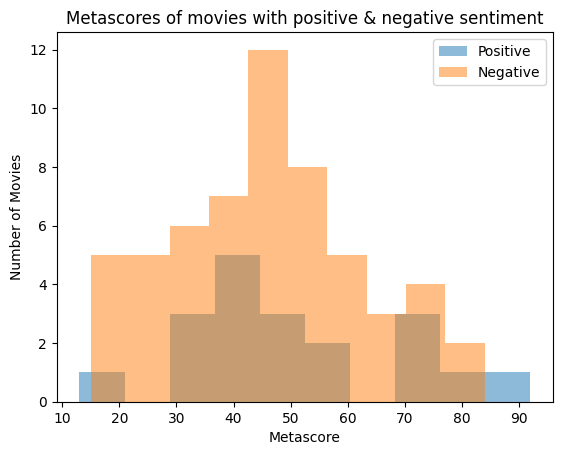

In [ ]:
from matplotlib import pyplot

# Create two subsets of data "happy_movies" and "sad_movies" based off the sentiment values
happy_movies = unified_view[unified_view['sentiment'] > 1].score
sad_movies = unified_view[unified_view['sentiment'] < -1].score

# Plotting histograms for the sentiment scores 
pyplot.hist(happy_movies, alpha=0.5, label="Positive")
pyplot.hist(sad_movies, alpha=0.5, label="Negative")

# Adding labels and title
pyplot.title('Metascores of movies with positive & negative sentiment')
pyplot.xlabel('Metascore')
pyplot.ylabel('Number of Movies')
pyplot.legend(loc='upper right')

pyplot.show()

The graph illustrates the distribution of movies based on their metascores, categorized into positive and negative sentiments. A notable observation is the prevalence of movies with a metascore rating in the 40-50 range that are associated with negative sentiment. While this prompts the consideration that viewers might lean towards more positive movies, it's crucial to acknowledge that the presence of positive sentiment in certain movies doesn't inherently imply a preference for positivity among audiences. The majority of movies with positive sentiment cluster around the 35-45 metascore range, introducing complexity to the notion that people unequivocally prefer positive films. This insight prompts further exploration to unravel the nuanced dynamics between metascores, sentiment, and audience preferences.

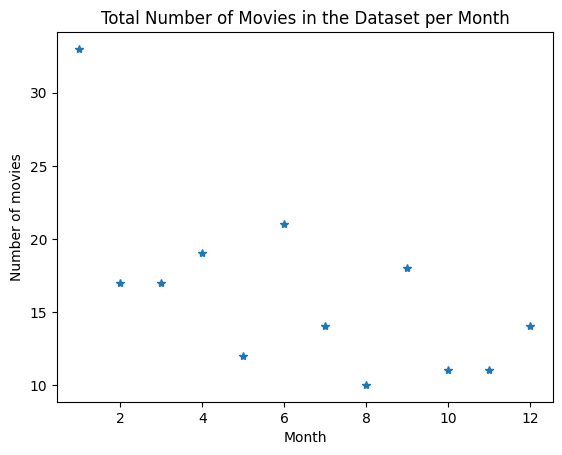

In [ ]:
from matplotlib import pyplot

# Group by month
monthly_view = unified_view ['release_month'].groupby(unified_view.release_month).agg('count')

# Plotting monthly number of movies 
pyplot.title('Total Number of Movies in the Dataset per Month')
pyplot.xlabel('Month')
pyplot.ylabel('Number of movies')
pyplot.plot(monthly_view, '*')
pyplot.show()


The presented graph offers an overview of the distribution of movies within the dataset across different months. Notably, January emerges as the peak month for movie releases. While the observation suggests a concentration of releases during this period, a more in-depth analysis could explore the potential correlations between release timing and various factors such as revenue and user ratings. By delving deeper into the data, one could uncover insights into whether movies released in January tend to generate higher revenue or receive more favorable user ratings. This line of inquiry could serve as a foundation for a more comprehensive exploration, providing a nuanced understanding of the patterns and dynamics within the dataset beyond surface-level observations.